# Homework

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.


### Loading the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv('data/housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data = dataset[['latitude',
                'longitude',
                'housing_median_age',
                'total_rooms',
                'total_bedrooms',
                'population',
                'households',
                'median_income',
                'median_house_value',
                'ocean_proximity']].copy()

In [4]:
features = ['latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            'ocean_proximity']

In [5]:
data.fillna(0, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer


df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(data, test_size=0.2, random_state=1)

In [7]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [8]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [9]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [10]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict('records')
X_train = dv.fit_transform(train_dict)

In [11]:
val_dict = df_val.to_dict('records')
test_dict = df_test.to_dict('records')
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity=INLAND`
* `total_rooms`
* `latitude`
* `population`

In [12]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [13]:
dtr_model = DecisionTreeRegressor(max_depth=1)
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [14]:
print(export_text(dtr_model, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



**Answer: ocean_proximity=INLAND**

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.05
* 0.25
* 0.55
* 0.85

In [18]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [21]:
round(rmse(y_val, rfr_model.predict(X_val)), 2)

0.24

**Answer: 0.25**

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 55
- 75
- 150


In [41]:
n_estimators = list(range(10, 201, 10))
scores = []
for n in n_estimators:
    rfr_model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfr_model.fit(X_train, y_train)
    scores.append(round(rmse(y_val, rfr_model.predict(X_val)), 3))
    

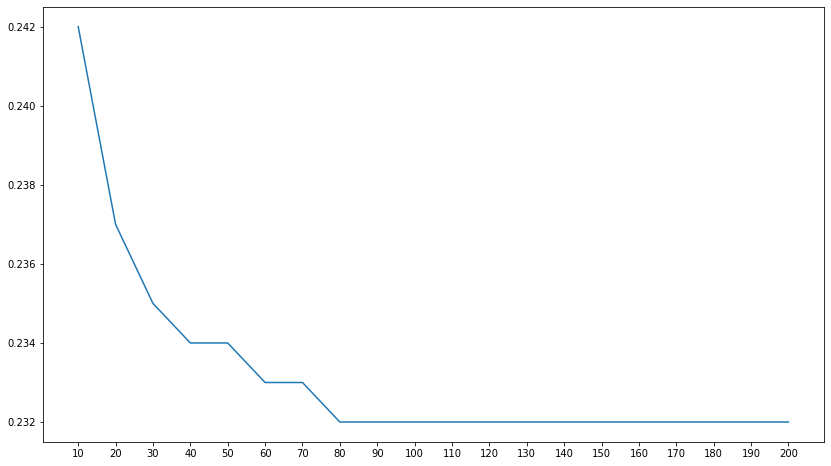

In [42]:
plt.figure(figsize=(14,8))
plt.plot(n_estimators, scores)
plt.xticks(n_estimators);

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25